GPU: -1
# dim z: 2
# Minibatch-size: 1200
# epoch: 200

38 88
25 96
36 21
39 70
28 96
33 67
22 112
22 88
19 67
32 21
24 68
16 112
25 43
22 104
25 65
25 73
17 107
20 122
24 45
27 31
22 57
23 93
18 108
31 106
41 94
31 50
16 32
24 113
29 123
34 99
23 19
31 117
36 64
33 64
15 85
26 14
25 82
36 48
17 44
16 48
(array([38], dtype=int64), array([88], dtype=int64))


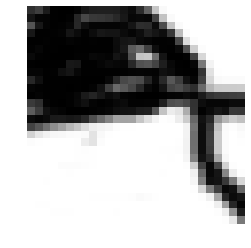

[0. 0. 0. ... 0. 0. 0.]
(array([25], dtype=int64), array([96], dtype=int64))


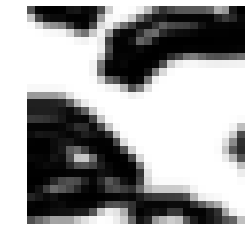

[0. 0. 0. ... 0. 0. 0.]
(array([36], dtype=int64), array([21], dtype=int64))


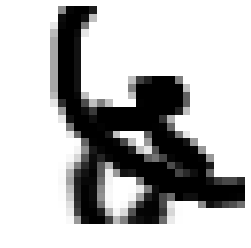

[0. 0. 0. ... 0. 0. 0.]
(array([39], dtype=int64), array([70], dtype=int64))


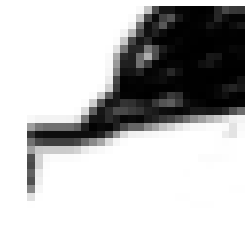

[0. 0. 0. ... 0. 0. 0.]
(array([28], dtype=int64), array([96], dtype=int64))


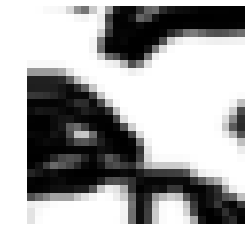

[0. 0. 0. ... 0. 0. 0.]
(array([33], dtype=int64), array([67], dtype=int64))


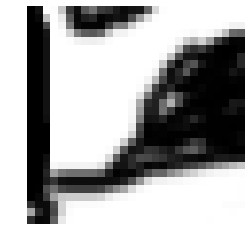

[0. 0. 0. ... 0. 0. 0.]
(array([22], dtype=int64), array([112], dtype=int64))


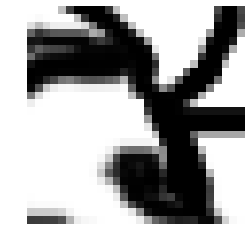

[0. 0. 0. ... 0. 0. 0.]
(array([22], dtype=int64), array([88], dtype=int64))


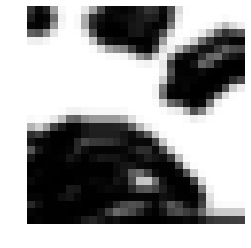

[0. 0. 0. ... 0. 0. 0.]
(array([19], dtype=int64), array([67], dtype=int64))


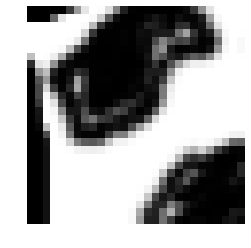

[0. 0. 0. ... 0. 0. 0.]
(array([32], dtype=int64), array([21], dtype=int64))


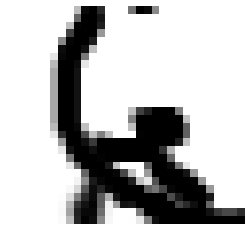

[0. 0. 0. ... 0. 0. 0.]
7840


Exception in main training loop: name 'cupy' is not defined
Traceback (most recent call last):
  File "C:\Users\cihsato\Anaconda3\envs\chainer4\lib\site-packages\chainer\training\trainer.py", line 316, in run
    update()
  File "C:\Users\cihsato\Anaconda3\envs\chainer4\lib\site-packages\chainer\training\updaters\standard_updater.py", line 149, in update
    self.update_core()
  File "C:\Users\cihsato\Anaconda3\envs\chainer4\lib\site-packages\chainer\training\updaters\standard_updater.py", line 160, in update_core
    optimizer.update(loss_func, *in_arrays)
  File "C:\Users\cihsato\Anaconda3\envs\chainer4\lib\site-packages\chainer\optimizer.py", line 650, in update
    loss = lossfun(*args, **kwds)
  File "C:\Users\cihsato\Documents\MATLAB\Study\AutoEncoder\jupyter\I_cvae\net.py", line 67, in lf
    xp = cupy.get_array_module(t0)
Will finalize trainer extensions and updater before reraising the exception.


NameError: name 'cupy' is not defined

In [1]:
"""CVAE on MNIST
"""
import argparse
import os

import chainer
import pickle
import matplotlib.pyplot as plt
from chainer import training
from chainer.training import extensions
from PIL import Image, ImageDraw
import numpy as np

import net 
import make_random_mnist
import make_random_selfdata
from chainer import serializers
%matplotlib inline


NLABELDIM = 1
NZDIM = 2

def load_save_random_dataset_withlabel(fname, n):
    dataset = make_random_mnist.MakeRandomMNIST()
    if os.path.exists(fname):
        with open(fname, mode='rb') as f:
            ret = pickle.load(f)
            return ret
    v = dataset.get_random_dataset_with_label(n)
    with open(fname, mode='wb') as f:
        pickle.dump(v, f)
        return v

def dispImage(img_vec):
    #title = 'Label number is ('+ str(label_x) + ',' + str(label_y) + ')' 
    pixels = (img_vec * 256).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.axis("off")
    #plt.title(title)
    plt.show()

def main():
    global NLABELDIM, NZDIM
    parser = argparse.ArgumentParser(description='Chainer example: VAE')
    parser.add_argument('--initmodel', '-m', default='',
                        help='Initialize the model from given file')
    parser.add_argument('--resume', '-r', default='',
                        help='Resume the optimization from snapshot')
    parser.add_argument('--gpu', '-g', default=-1, type=int,
                        help='GPU ID (negative value indicates CPU)')
    parser.add_argument('--out', '-o', default='result',
                        help='Directory to output the result')
    parser.add_argument('--epoch', '-e', default=200, type=int,
                        help='number of epochs to learn')
    parser.add_argument('--dimz', '-z', default=2, type=int,
                        help='dimention of encoded vector')
    parser.add_argument('--batchsize', '-b', type=int, default=1200,
                        help='learning minibatch size')
    parser.add_argument('--test', action='store_true',
                        help='Use tiny datasets for quick tests')
    args = parser.parse_args(args=['-g 0'])

    print('GPU: {}'.format(args.gpu))
    print('# dim z: {}'.format(args.dimz))
    print('# Minibatch-size: {}'.format(args.batchsize))
    print('# epoch: {}'.format(args.epoch))
    print('')


    # Load the MNIST dataset
    #train, test = chainer.datasets.get_mnist()
    #train = load_save_random_dataset_withlabel('random_wlabel_train.pickle', 60000)
    #test = load_save_random_dataset_withlabel('random_wlabel_test.pickle', 10000)
    
    #dataset = make_random_mnist.MakeRandomMNIST()
    #train = dataset.get_random_dataset_with_hot_vector(60000)
    #test = dataset.get_random_dataset_with_hot_vector(1000)

    #train = load_save_random_dataset_withlabel('imu_axislabel_train.pickle', 10000)
    #test = load_save_random_dataset_withlabel('inu_axislabel_test.pickle', 6000)
    
    #img = '../images/chizu_naga.png'
    img = '../images/inu.png'
    dataset = make_random_selfdata.MakeRandomSelfdata(img)
    #train = dataset.get_random_dataset_with_label(3000)
    #test = dataset.get_random_dataset_with_label(1000)
    
    #train = dataset.get_random_dataset_with_hot_vector(3000)
    #test = dataset.get_random_dataset_with_hot_vector(1000)
    
    #train = dataset.get_random_dataset_with_x_coordinate(3000)
    #test = dataset.get_random_dataset_with_x_coordinate(1000)
    
    
    #train = dataset.get_random_dataset_with_hot_vector_2d(3000)
    #test = dataset.get_random_dataset_with_hot_vector_2d(1000)
    
    train = dataset.get_random_dataset_with_one_hot_vector_2d(30)
    test = dataset.get_random_dataset_with_one_hot_vector_2d(10)
    #print('-------------------------------------------')
    for t in range(10):
        v = train[t][1].reshape(56,140)
        print(np.where(v == 1))
        dispImage(train[t][0])
        print(train[t][1])
    
    NLABELDIM = len(train[0][1])
    print(NLABELDIM)

    if args.test:
        train, _ = chainer.datasets.split_dataset(train, 100)
        test, _ = chainer.datasets.split_dataset(test, 100)

    train_iter = chainer.iterators.SerialIterator(train, args.batchsize)
    test_iter = chainer.iterators.SerialIterator(test, args.batchsize,
                                                 repeat=False, shuffle=False)

    # Prepare CVAE model, defined in net.py
    NZDIM = args.dimz
    model = net.MyCVAE(784, args.dimz, 500, NLABELDIM)

    # Setup an optimizer
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(model)

    # Initialize
    if args.initmodel:
        chainer.serializers.load_npz(args.initmodel, model)

    # Set up an updater. StandardUpdater can explicitly specify a loss function
    # used in the training with 'loss_func' option
    updater = training.updaters.StandardUpdater(
        train_iter, optimizer,
        device=args.gpu, loss_func=model.get_loss_func())

    trainer = training.Trainer(updater, (args.epoch, 'epoch'), out=args.out)
    trainer.extend(extensions.Evaluator(test_iter, model, device=args.gpu,
                                        eval_func=model.get_loss_func(k=10)))
    trainer.extend(extensions.dump_graph('main/loss'))
    trainer.extend(extensions.snapshot(), trigger=(20, 'epoch'))
    trainer.extend(extensions.LogReport())
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'validation/main/loss',
         'main/rec_loss', 'validation/main/rec_loss', 'elapsed_time']))
    #trainer.extend(extensions.ProgressBar())

    if args.resume:
        chainer.serializers.load_npz(args.resume, trainer)

    # Run the training
    trainer.run()

    # Visualize the results
    def save_images(x, filename):
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(3, 3, figsize=(9, 9), dpi=100)
        for ai, xi in zip(ax.flatten(), x):
            ai.imshow(xi.reshape(28, 28))
        fig.savefig(filename)

    model.to_cpu()
    serializers.save_npz("mymodel_final.npz", model)

    train_ind = [1, 3, 5, 10, 2, 0, 13, 15, 17]
    xin = np.empty((0, 28*28), np.float32)
    xout = np.empty((0, 28*28), np.float32)
    for ind in train_ind:
        x, t = train[ind]
        x = np.expand_dims(x, axis=0)
        t = np.expand_dims(t.astype(np.float32), axis=0)
        #t = np.eye(NLABELDIM, dtype=np.float32)[t * NLABELDIM]
        with chainer.using_config('train', False), chainer.no_backprop_mode():
            x1 = model(x, np.expand_dims(t, axis=0))
            xin = np.append(xin, x, axis=0)
            xout = np.append(xout, x1.data, axis=0)

    save_images(xin, os.path.join(args.out, 'train'))
    save_images(xout, os.path.join(args.out, 'train_reconstructed'))

    test_ind = [3, 2, 1, 18, 4, 8, 11, 17, 61]
    xin = np.empty((0, 28*28), np.float32)
    xout = np.empty((0, 28*28), np.float32)
    for ind in test_ind:
        x, t = test[ind]
        x = np.expand_dims(x, axis=0)
        t = np.expand_dims(t.astype(np.float32), axis=0)
        #t = np.eye(NLABELDIM, dtype=np.float32)[t * NLABELDIM]
        with chainer.using_config('train', False), chainer.no_backprop_mode():
            x1 = model(x, np.expand_dims(t, axis=0))
            xin = np.append(xin, x, axis=0)
            xout = np.append(xout, x1.data, axis=0)

    save_images(xin, os.path.join(args.out, 'test'))
    save_images(xout, os.path.join(args.out, 'test_reconstructed'))

    # draw images from randomly sampled z
    z = chainer.Variable(np.random.normal(0, 1, (9, args.dimz)).astype(np.float32))
    #z = chainer.Variable(np.zeros((9, args.dimz), dtype=np.float32))

    #values = np.eye(NLABELDIM, dtype=np.float32)[range(9)]
    labels = np.linspace(0, 0.9, 9, dtype=np.float32) * NLABELDIM
    labels = labels.astype(dtype=np.int32)
    values = np.eye(NLABELDIM, dtype=np.float32)[labels]
    x = model.decode(z, np.expand_dims(values, axis=1))
    save_images(x.data, 'sampled')
    
if __name__ == '__main__':
    main()

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
14 14
14 42
14 70
14 98
14 126
42 14
42 42
42 70
42 98
42 126
----------------------
(10, 7840)


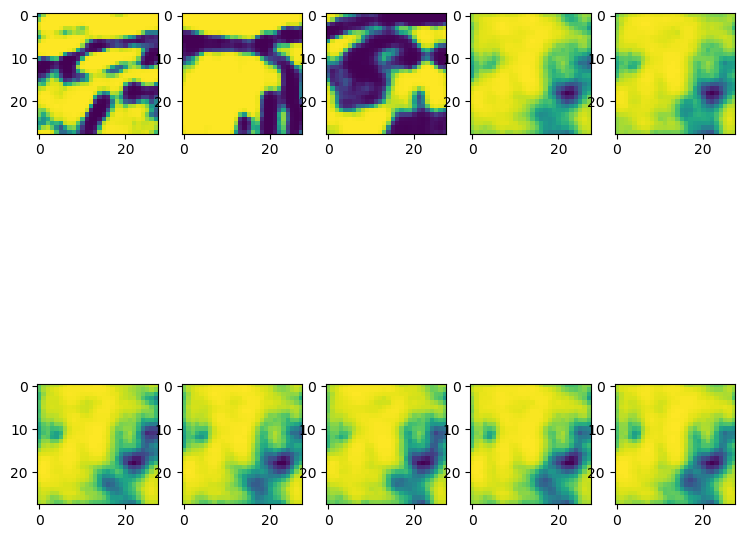

In [2]:
# Visualize the results
def save_images(x, filename):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(2, 5, figsize=(9, 9), dpi=100)
    for ai, xi in zip(ax.flatten(), x):
        ai.imshow(xi.reshape(28, 28))
    fig.savefig(filename)

model = net.MyCVAE(784, NZDIM, 500, NLABELDIM)
serializers.load_npz("mymodel_final.npz", model)

# draw images from randomly sampled z
z = chainer.Variable(np.random.normal(0, 1, (10, NZDIM)).astype(np.float32))
z = chainer.Variable(np.zeros((10, NZDIM), dtype=np.float32))


#values = np.eye(NLABELDIM, dtype=np.float32)[range(9)]
#pos = np.linspace(0.05, 0.85, 9, dtype=np.float32)
pos = np.linspace(0.1, 0.9, 9, dtype=np.float32)
print(pos)
labels = pos * NLABELDIM

labels = labels.astype(dtype=np.int32)
#values = np.eye(NLABELDIM, dtype=np.float32)[labels]     # one hot vector
#values = np.linspace(0.1, 0.9, 9, dtype=np.float32)       # label and coordinate
'''                                                       # hot vector
labels = np.zeros((10, 70), dtype=np.float32)
for c in range(2):
    for r in range(5):
        #print(r, c)
        lvec_r = np.eye(50, dtype=np.float32)[10*r+5]
        lvec_c = np.eye(20, dtype=np.float32)[10*c+5]
        #print(10*r,10*c)
        lvec = np.append(lvec_r, lvec_c)
        #print(lvec_r, lvec_c)
        labels[c*5+r, :] = lvec
values = labels
'''
labels = np.zeros((10, 56*140), dtype=np.float32)       # one hot vector
for r in range(2):
    for c in range(5):
        l = np.zeros((56, 140), dtype=np.float32)
        l[28*r + 14][28*c + 14] = 1
        print(28*r + 14, 28*c + 14)
        labels[r*5+c, :] = np.ravel(l)
values = labels
print('----------------------')
print(values.shape)
x = model.decode(z, np.expand_dims(values, axis=1))
save_images(x.data, 'sampled')

In [ ]:
#!/usr/bin/env python
"""Chainer example: train a VAE on MNIST
"""
import argparse
import os

import chainer
from chainer import training
from chainer.training import extensions
import numpy as np

import net
import make_random_mnist
import pickle

def load_random_dataset_nolabel():
    with open('random_dataset.pickle', mode='rb') as f:
        ret = pickle.load(f)
        return ret

def save_random_dataset_nolabel( v):
    with open('random_dataset.pickle', mode='wb') as f:
        pickle.dump(v, f)
        
def main():
    parser = argparse.ArgumentParser(description='Chainer example: VAE')
    parser.add_argument('--initmodel', '-m', default='',
                        help='Initialize the model from given file')
    parser.add_argument('--resume', '-r', default='',
                        help='Resume the optimization from snapshot')
    parser.add_argument('--gpu', '-g', default=-1, type=int,
                        help='GPU ID (negative value indicates CPU)')
    parser.add_argument('--out', '-o', default='result',
                        help='Directory to output the result')
    parser.add_argument('--epoch', '-e', default=100, type=int,
                        help='number of epochs to learn')
    parser.add_argument('--dimz', '-z', default=20, type=int,
                        help='dimention of encoded vector')
    parser.add_argument('--batchsize', '-b', type=int, default=1200,
                        help='learning minibatch size')
    parser.add_argument('--test', action='store_true',
                        help='Use tiny datasets for quick tests')
    args = parser.parse_args(args = ['-g -1'])

    print('GPU: {}'.format(args.gpu))
    print('# dim z: {}'.format(args.dimz))
    print('# Minibatch-size: {}'.format(args.batchsize))
    print('# epoch: {}'.format(args.epoch))
    print('')

    # Prepare VAE model, defined in net.py
    model = net.VAE(784, args.dimz, 2000)

    # Setup an optimizer
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(model)

    # Initialize
    if args.initmodel:
        chainer.serializers.load_npz(args.initmodel, model)

    # Load the MNIST dataset
    train, test = chainer.datasets.get_mnist(withlabel=False)
    dataset = make_random_mnist.MakeRandomMNIST()
    #train = dataset.get_random_dataset_nolabel(60000)
    #save_random_dataset_nolabel(train)
    train = load_random_dataset_nolabel()
    print(train.shape)

    if args.test:
        train, _ = chainer.datasets.split_dataset(train, 100)
        test, _ = chainer.datasets.split_dataset(test, 100)

    train_iter = chainer.iterators.SerialIterator(train, args.batchsize)
    test_iter = chainer.iterators.SerialIterator(test, args.batchsize,
                                                 repeat=False, shuffle=False)

    # Set up an updater. StandardUpdater can explicitly specify a loss function
    # used in the training with 'loss_func' option
    updater = training.updaters.StandardUpdater(
        train_iter, optimizer,
        device=args.gpu, loss_func=model.get_loss_func())
    #updater = training.updaters.ParallelUpdater(train_iter, optimizer, devices={'main': 0, 'second': 1})

    trainer = training.Trainer(updater, (args.epoch, 'epoch'), out=args.out)
    trainer.extend(extensions.Evaluator(test_iter, model, device=args.gpu,
                                        eval_func=model.get_loss_func(k=10)))
    trainer.extend(extensions.dump_graph('main/loss'))
    trainer.extend(extensions.snapshot(), trigger=(args.epoch, 'epoch'))
    trainer.extend(extensions.LogReport())
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'validation/main/loss',
         'main/rec_loss', 'validation/main/rec_loss', 'elapsed_time']))
    #trainer.extend(extensions.ProgressBar())

    if args.resume:
        chainer.serializers.load_npz(args.resume, trainer)

    # Run the training
    trainer.run()

    # Visualize the results
    def save_images(x, filename):
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(3, 3, figsize=(9, 9), dpi=100)
        for ai, xi in zip(ax.flatten(), x):
            ai.imshow(xi.reshape(28, 28))
        fig.savefig(filename)

    model.to_cpu()
    train_ind = [1, 3, 5, 10, 2, 0, 13, 15, 17]
    x = chainer.Variable(np.asarray(train[train_ind]))
    with chainer.using_config('train', False), chainer.no_backprop_mode():
        x1 = model.decode(model.encode(x)[0])
    save_images(x.data, os.path.join(args.out, 'train'))
    save_images(x1.data, os.path.join(args.out, 'train_reconstructed'))

    test_ind = [3, 2, 1, 18, 4, 8, 11, 17, 61]
    x = chainer.Variable(np.asarray(test[test_ind]))
    with chainer.using_config('train', False), chainer.no_backprop_mode():
        x1 = model.decode(model.encode(x)[0])
    save_images(x.data, os.path.join(args.out, 'test'))
    save_images(x1.data, os.path.join(args.out, 'test_reconstructed'))

    # draw images from randomly sampled z
    z = chainer.Variable(
        np.random.normal(0, 1, (9, args.dimz)).astype(np.float32))
    x = model.decode(z)
    save_images(x.data, os.path.join(args.out, 'sampled'))


if __name__ == '__main__':
    main()
